In [1]:
import csv
import pandas as pd
import numpy as np
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import re

In [2]:
train = pd.read_csv('sindonewscom.csv', encoding= 'utf8', sep=',')

In [3]:
train = train[['News Title', 'News Summary']]

In [4]:
train

,News Title,News Summary
0,"Jalan Longsor, Dinas PUPR Muba Membuat Konstru...",Longsor yang terjadi pada Rabu (23/1/2019) sor...
1,Menkeu Sebut Kementerian Agama Miliki Anggaran...,Kementerian Agama menjadi urutan kedua daftar ...
2,"Dalami Suap di KemenPUPR, KPK Periksa Eks Dirj...",KPK telah melakukan pemeriksaan terhadap manta...
3,KPK Indentifikasi 20 Proyek KemenPUPR Didapati...,KPK mengidentifikasi setidaknya ada 20 proyek ...
4,Pemerintah Dituding Lamban Tangani Longsor Sib...,"DPRD Simalungun menuding pemerintah daerah, Ke..."
5,Menangani Korupsi Proyek Bencana Alam,"Di penghujung 2018, KPK menutup catatan akhir ..."
6,KPK Sita Dokumen 12 Proyek Anggaran Rp500 M di...,"KPK kembali menyita uang sejumlah Rp1,2 miliar..."
7,"Kasus Suap KemenPUPR, Tiga Lokasi Digeledah da...",KPK kembali menggeledah sejumlah lokasi terkai...
8,"Usut Korupsi Kementerian PUPR, KPK Temukan Pro...",Komisi Pemberantasan Korupsi (KPK) menemukan d...
9,"Geledah Ditjen Cipta Karya, KPK Sita Uang Rp80...",Tim penyidik Komisi Pemberantasan Korupsi (KPK...


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [6]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [7]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [8]:
tags_lower = train['News Title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [9]:
stop_words = list(get_stop_words('id'))         
nltk_words = list(stopwords.words('indonesian'))   
stop_words.extend(nltk_words)


In [10]:
word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [11]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [12]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]    

In [13]:
top_N = 10000

In [14]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

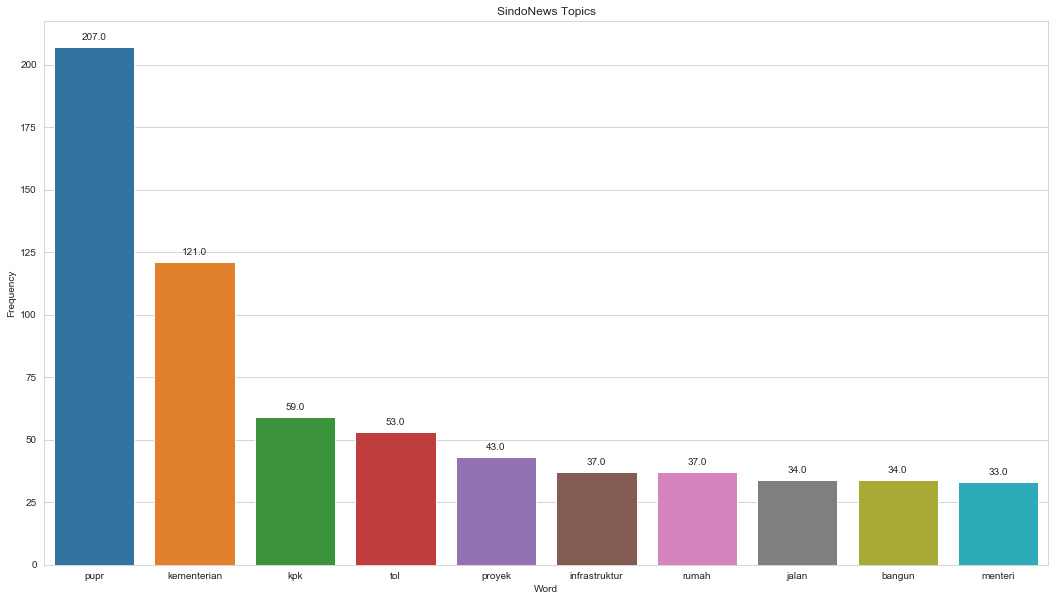

In [15]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
plt.title('SindoNews Topics')
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(10))

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.



In [16]:
bloblist_desc = list()

train_descr_str=train['News Title'].astype(str)
for row in train_descr_str:
    blob = TextBlob(row)
    an = blob.translate(from_lang='id', to='en')
    bloblist_desc.append((row,an.sentiment.polarity, an.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


HTTPError: HTTP Error 503: Service Unavailable

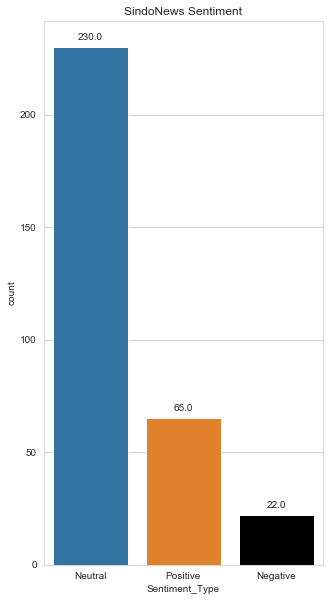

In [17]:
 
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('SindoNews Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)



In [18]:
bloblist_desc = list()
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")

In [19]:
train_descr_str1=train['News Title'].astype(str)
for row in train_descr_str1:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


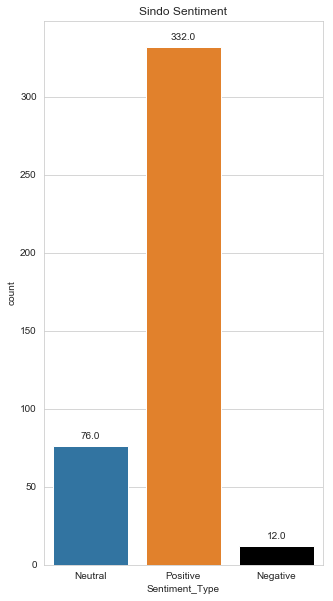

In [20]:
 
def f(train_polarity_desc1):
    if train_polarity_desc1['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc1['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc1['Sentiment_Type'] = train_polarity_desc1.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('Sindo Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc1, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [22]:
train_polarity_desc1.to_csv('sindonewsSentiment1.csv')